In [ ]:
import pandas as pd
import random
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score

# CARREGAMENTO E SEPARAÇÃO DA BASE DE DADOS

---







In [ ]:
dataset = pd.read_csv('credit_data.csv') #importando o dataset

In [ ]:
dataset.shape

(2000, 5)

In [ ]:
dataset.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [ ]:
dataset.dropna(inplace=True) #excluindo valores nulos
dataset.shape

(1997, 5)

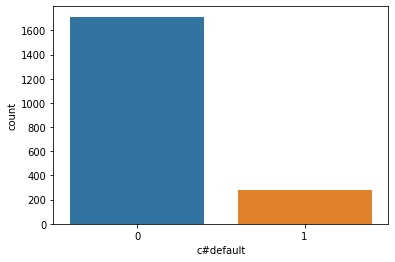

In [ ]:
import seaborn as sns
sns.countplot(x=dataset['c#default']); #visualizando a qtd de valores por resultado

In [ ]:
X = dataset.iloc[:,1:4].values
#separando as variaveis que podem ser levadas em conta na classificacao que no caso dessa base seriam as colunas (income,age,loan)

In [ ]:
X.shape

(1997, 3)

In [ ]:
X

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [ ]:
y = dataset.iloc[:,4].values
#separando as informações dos resultados da classificação que são separados das variaveis

In [ ]:
y.shape

(1997,)

In [ ]:
y

array([0, 0, 0, ..., 1, 0, 0])

#BASE DE TREINAMENTO E TESTE

---





In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X,y,test_size = 0.2, stratify = y)

#criando as bases de treino e teste, onde 80% de treino e 20% de teste e estratificada com base no y

In [ ]:
X_treinamento.shape, y_treinamento.shape

((1597, 3), (1597,))

A base X (income,age,loan) está com 80% do data set
A base y (c#default) que é a o resultado em si com 80% do ds}

In [ ]:
np.unique(y, return_counts=True)

#retornando a quantidade de cada valor que existe no dataset, como tem so 0,1 ele apresenta a qtd
#nesse caso podemos comparar se o percentual de valores de qtd de 0,1 esta balanceado com o dataset original

(array([0, 1]), array([1714,  283]))

In [ ]:
np.unique(y_treinamento, return_counts=True)

(array([0, 1]), array([1371,  226]))

#Classificação com NAIVE BAYES

---


In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
modelo = GaussianNB()
modelo.fit(X_treinamento,y_treinamento)

#criando o modelo com base no algoritmo de NB inserindo as bases de treinamento e teste criadas anteriormente

GaussianNB()

In [ ]:
previsoes = modelo.predict(X_teste)

#aplicando o modelo de predição com base no algoritmo NB que foi treinado na variavel criada acima modelo
#inserido como argumento da função, a base teste criada que equivale a 20% do dataset

In [ ]:
previsoes

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,

In [ ]:
y_teste

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,

In [ ]:
from sklearn.metrics import accuracy_score
#biblioteca que trabalha com acuracia do modelo

In [ ]:
accuracy_score(y_teste,previsoes)

#funcao que de fato calcula a acuracia do modelo, passando como argumento a variavel y_teste
#no qual esta o resultado real da base de teste e compara com a variavel previsoes que esta com os resultados preditivos

0.93

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_teste,previsoes)
cm

#essa funcao retorna do lado esquerdo as quantidades que acertou e do lado direito a quantidade que errou de cada valor

array([[339,   4],
       [ 24,  33]])

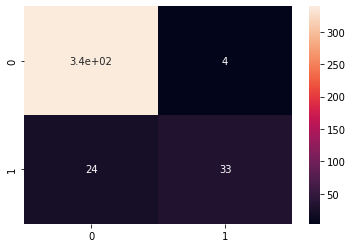

In [ ]:
sns.heatmap(cm, annot=True);

#essa viz nos mostra as possibilidades e os erros e os acertos do modelo
#por exemplo na coluna 0 linha 0 o modelo acertou 337 do total de pessoas que pagaram

In [ ]:
# Percentual de acerto para pessoas que pagam o empréstimo
337 / (337 + 6)

0.9825072886297376

In [ ]:
# Percentual de acerto para pessoas que não pagam o empréstimo
37 / (37 + 6)

0.8604651162790697

Com esse resultado de 98% de chance de acertamos o resultado dos que pagam emprestimos e 86% de chance de acertamos o resultado de que não paga, é muito arriscado por exemplo para um banco, pois a cada 100 emprestimos que fizerem, provavelmente 14 não vão pagar, precisamos então melhorar essa análise preditiva para garantir um score maior de pessoas que não irão pagar o emprestimo. Podemos perceber que essa causa pode ser pelo fato de que temos ainda poucas informações sobre os clientes que não pagam, pois a grande parte dos dados são de clientes que pagam. Então nesses casos temos que usar o conceito de UNDERSAMPLING ou de OVERSAMPLING

# UNDERSAMPLING TOMEKLINKS

---




In [ ]:
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(sampling_strategy='majority') #criando o objeto tomeklinks
X_under, y_under = tl.fit_resample(X, y) #aplicando o undersampling atraves do DS original

In [ ]:
X_under.shape, y_under.shape

((1897, 3), (1897,))

In [ ]:
np.unique(y, return_counts=True) #checando os dados do ds original

(array([0, 1]), array([1714,  283]))

In [ ]:
np.unique(y_under, return_counts=True) #podemos ver que com a tecnica os dados da classe 0 diminuiram

(array([0, 1]), array([1614,  283]))

In [ ]:
X_treinamento_u, X_teste_u, y_treinamento_u, y_teste_u = train_test_split(X_under,y_under,test_size=0.2,stratify=y_under)

#criando as variaves de treino e teste com o novo dataset

In [ ]:
X_treinamento_u.shape, X_teste_u.shape

((1517, 3), (380, 3))

In [ ]:
modelo_u = GaussianNB() #criando o objeto da classificacao que cria a tabela de probabilidades
modelo_u.fit(X_treinamento_u,y_treinamento_u) #treinando o modelo
previsoes_u = modelo_u.predict(X_teste_u) #usando a base teste para realizar a predicao dos dados de entrada teste
accuracy_score(y_teste_u,previsoes_u) #calculando o score

0.9184210526315789

In [ ]:
cm_u = confusion_matrix(y_teste_u, previsoes_u) #analisando a quantidade de acertos e erros
cm_u

array([[316,   7],
       [ 24,  33]])

In [ ]:
315 / (315 + 26)

0.9237536656891495

In [ ]:
31 / (31 + 8)

0.7948717948717948

Nesse caso, o nosso resultado de erro em relação as pessoas que não pagaram o emprestimo ainda é insatisfatório, pois com o desbalanceamento utilizando o oversampling nós diminuimos mais ainda o score para 79% enquanto sem desbalanceamento o score era 86%. Nesse caso devemos tentar aplicar um oversampling para testar.

# OVERSAMPLING SMOTE

---


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(sampling_strategy='minority') #criamos o objeto smote para aplicar o oversampling
X_over, y_over = smote.fit_resample(X,y) #aplicamos o desbalanceamento do tipo smote com o metodo

In [ ]:
X_over.shape, y_over.shape

((3428, 3), (3428,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1714,  283]))

In [ ]:
np.unique(y_over,return_counts= True) #comparando as bases de dados com a original, podemos ver que o numero de registro igualou

(array([0, 1]), array([1714, 1714]))

In [ ]:
X_treinamento_o , X_teste_o , y_treinamento_o, y_teste_o = train_test_split(X_over,y_over,test_size=0.2,stratify=y_over)

#criando as variaveis de treino e teste

In [ ]:
X_treinamento_o.shape, X_teste_o.shape

((2742, 3), (686, 3))

In [ ]:
modelo_o = GaussianNB()
modelo_o.fit(X_treinamento_o,y_treinamento_o)
previsoes_o = modelo_o.predict(X_teste_o)

#criando o modelo de classificacao com base nas novas base de dados

In [ ]:
accuracy_score(y_teste_o,previsoes_o) #analisando a acuracia

0.9037900874635568

In [ ]:
cm_o = confusion_matrix(y_teste_o, previsoes_o) #Corrigido 04/10/2021
cm_o

array([[300,  43],
       [ 23, 320]])

In [ ]:
305 / (305 + 19)

0.941358024691358

In [ ]:
324 / (324 + 38)

0.8950276243093923

Podemos ver que utilizando o algoritmo SMOTE e trabalhando o desbalanceamento com a tecnica de oversampling, o score geral diminiu um pouco com relação ao modelo original sem desbalanceamento.

Porém, se formos analisar os resultados de acertos dos clientes que pagaram melhorou de 93% para 94%. E no caso dos clientes que nao pagaram, aumentamos de 86% para 89% tendo uma melhora, onde podemos então considerar esse modelo melhor.

# EXERCICIO

---



In [ ]:
datasetEx = pd.read_csv('csv_result-ebay_confianca_completo.csv')

In [ ]:
datasetEx.shape

(5806, 75)

In [ ]:
datasetEx.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


In [ ]:
datasetEx['blacklist'] = datasetEx['blacklist'] == 'S'

In [ ]:
datasetEx.dropna(inplace=True) #excluindo valores nulos
datasetEx.shape

(5806, 75)

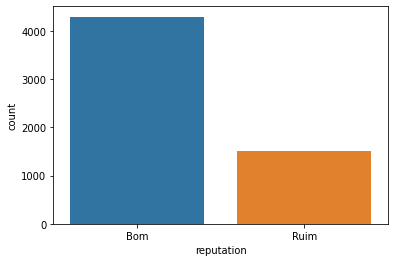

In [ ]:
sns.countplot(x=datasetEx['reputation']);

In [ ]:
X_ex = datasetEx.iloc[:,0:74].values

In [ ]:
y_ex = datasetEx.iloc[:,74].values

In [ ]:
X_ex.shape, y_ex.shape

((5806, 74), (5806,))

In [ ]:
X_ex_treinamento, X_ex_teste , y_ex_treinamento, y_ex_teste = train_test_split(X_ex,y_ex,test_size=0.2,stratify=y_ex)


In [ ]:
np.unique(y_ex, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [ ]:
4299 / (4299+1507) #% bom base original

0.7404409231829142

In [ ]:
np.unique(y_ex_treinamento, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3439, 1205]))

In [ ]:
3439 / (3439+1205) #% bom base treinamento

0.7405254091300603

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
modelo = RandomForestClassifier()

In [ ]:
modelo.fit(X_ex_treinamento,y_ex_treinamento)

RandomForestClassifier()

In [ ]:
previsoes = modelo.predict(X_ex_teste)

In [ ]:
accuracy_score(previsoes,y_ex_teste)

0.7461273666092944

In [ ]:
previsoes

array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Bom', 'Bom'], dtype=object)

In [ ]:
tl_ex = TomekLinks(sampling_strategy='majority')

In [ ]:
X_under_ex, y_under_ex = tl_ex.fit_resample(X_ex, y_ex)

In [ ]:
X_under_ex.shape , y_under_ex.shape

((5417, 74), (5417,))

In [ ]:
np.unique(y_under_ex, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([3910, 1507]))

In [ ]:
np.unique(y_ex, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 1507]))

In [ ]:
X_treinamento_u_ex, X_teste_u_ex, y_treinamento_u_ex, y_teste_u_ex = train_test_split(X_under_ex,y_under_ex,test_size=0.2,stratify=y_under_ex)


In [ ]:
modelo_u_ex = RandomForestClassifier()

In [ ]:
modelo_u_ex.fit(X_treinamento_u_ex,y_treinamento_u_ex)

RandomForestClassifier()

In [ ]:
previsoes_u_ex = modelo_u_ex.predict(X_teste_u_ex)

In [ ]:
accuracy_score(previsoes_u_ex,y_teste_u_ex)

0.7269372693726938

In [ ]:
smote = SMOTE(sampling_strategy='minority') #criamos o objeto smote para aplicar o oversampling
X_over_ex, y_over_ex = smote.fit_resample(X_ex,y_ex) #aplicamos o desbalanceamento do tipo smote com o metodo

In [ ]:
X_over_ex.shape, y_over_ex.shape

((8598, 74), (8598,))

In [ ]:
np.unique(y_over_ex, return_counts=True)

(array(['Bom', 'Ruim'], dtype=object), array([4299, 4299]))

In [ ]:
X_treinamento_o_ex, X_teste_o_ex, y_treinamento_o_ex, y_teste_o_ex = train_test_split(X_over_ex,y_over_ex,test_size=0.2,stratify=y_over_ex)

In [ ]:
modelo_o_ex = RandomForestClassifier()
modelo_o_ex.fit(X_treinamento_o_ex,y_treinamento_o_ex)
previsoes_o_ex = modelo_o_ex.predict(X_teste_o_ex)
accuracy_score(previsoes_o_ex,y_teste_o_ex)

0.8145348837209302